In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import fredapi as fa
import requests
import json
import prettytable
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.tseries.frequencies import to_offset



In [2]:
class SectorsOfTheMarket:
    
    def __init__(self):
        self.dict_sectors = {}
        #method calls
        market = self.market()
        volatility = self.market_volatility()
        finance_sector = self.finance_sector()
        technology_sector = self.technology_sector()
        software_sector = self.software_sector()
        internet_sector = self.internet_sector()
        semiconductor_sector = self.semiconductor_sector()
        healthcare_sector = self.healthcare_sector()
        biotech_sector = self.biotechnology_sector()
        pharmaceutical_sector = self.pharmaceutical_sector()
        energy_sector = self.energy_sector()
        clean_energy_sector = self.clean_energy_sector()
        real_estate_sector = self.real_estate_sector()
        construction_sector = self.construction_sector()
        industrial_sector = self.industrial_sector()
        consumer_discretionary_services = self.consumer_discretionary_service_sector()
        agriculture_sector = self.agriculture_sector()
        consumer_staples_sector = self.consumer_staples_sector()
        utilities_sector = self.utilities_sector()
        cyber_securities_sector = self.cyber_securities_sector()
        ecommerce_sector = self.ecommerce_sector()
        AI_sector = self.AI_sector()
        emerging_tech_sector = self.emerging_tech_sector()
        infrastructure_sector = self.infrastructure()
        commodities_sector = self.commodities_sector()
        oil = self.oil()
        telecommunications_sector = self.telecommunications_sector()
        basic_materials_sector = self.basic_materials_sector()
        transportation_sector = self.transportation_sector()
        emerging_market_sector = self.emerging_market_sector()
        water_resources_sector = self.water_resources_sector()
        gaming_esports_sector = self.gaming_esports_sector()
        self.display_daily_returns(self.dict_sectors)
        self.display_weekly_returns(self.dict_sectors)
        self.display_monthly_returns(self.dict_sectors)
        self.year_to_date_returns(self.dict_sectors)
        self.excel_writer(self.dict_sectors)
        
    def hour_wiper(df):   
            df = df.reset_index()
            df["Date"] = pd.to_datetime(df["Date"]).dt.date
            df = df.set_index('Date')
            return df
    
    def plot_factor(series_factor, x_label, y_label):
        plt.plot(series_factor.index, series_factor.values)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
    def data_grabber(self, ticker):
        #Function designed to take any ticker and grab annual data
        ticker = yf.Ticker(ticker)
        ticker_data = ticker.history(period = "max", interval = "1d")
        ticker_data = SectorsOfTheMarket.hour_wiper(ticker_data)
        
        if not ticker_data.empty:
            return ticker_data
        else:
            print(f"The associated data for {ticker} is empty")
       
        return ticker_data
    
    #Overall Market Metrics
    def market(self):
        df_SPY = self.data_grabber("^GSPC")
        self.dict_sectors["SPY"] = df_SPY
        SectorsOfTheMarket.plot_factor(df_SPY, "S&P 500 Price", "Year")
        return df_SPY
        
    def market_volatility(self):
        df_VIX = self.data_grabber("^VIX")
        self.dict_sectors["VIX"] = df_VIX
        SectorsOfTheMarket.plot_factor(df_VIX, "VIX Price", "Year")
        return df_VIX
    
    #All of the possible sectors of the market
    def finance_sector(self):
        df_VFH = self.data_grabber("VFH")
        self.dict_sectors["Financial Services Sector"] = df_VFH
        SectorsOfTheMarket.plot_factor(df_VFH, "Vanguard Financials Index Fund Index", "Year")
        return df_VFH
    
    def technology_sector(self):
        df_XLK = self.data_grabber("XLK")
        self.dict_sectors["Technology Sector"] = df_XLK
        SectorsOfTheMarket.plot_factor(df_XLK, "Technology Select Sector SPDR Fund Index", "Year")
        return df_XLK
    
    def software_sector(self):
        df_VGT = self.data_grabber("VGT")
        self.dict_sectors["Software Sector"] = df_VGT
        SectorsOfTheMarket.plot_factor(df_VGT, "Vanguard Information Technology Price", "Year")
        return df_VGT
        
    def internet_sector(self):
        df_FDN = self.data_grabber("FDN")
        self.dict_sectors["Internet Sector"] = df_FDN
        SectorsOfTheMarket.plot_factor(df_FDN, "First Trust Dow Jones Internet Index Fund Price", "Year")
        return df_FDN
        
    def semiconductor_sector(self):
        df_SOXX = self.data_grabber("SOXX")
        self.dict_sectors["Semiconductors Sector"] = df_SOXX
        SectorsOfTheMarket.plot_factor(df_SOXX, "iShares Semiconductor ETF Price", "Year") 
        return df_SOXX   
    
    def healthcare_sector(self):
        df_IHF = self.data_grabber("IHF")
        self.dict_sectors["Health Care Sector"] = df_IHF
        SectorsOfTheMarket.plot_factor(df_IHF, "iShares U.S. Healthcare Providers ETF Price", "Year")
        return df_IHF
    
    def biotechnology_sector(self):
        df_IBB = self.data_grabber("IBB")
        self.dict_sectors["Biotechnology Sector"] = df_IBB
        SectorsOfTheMarket.plot_factor(df_IBB, "iShares Biotechnology ETF Price", "Year")
        return df_IBB
    
    def pharmaceutical_sector(self):
        df_PPH = self.data_grabber("PPH")
        self.dict_sectors["Pharmaceuticals Sector"] = df_PPH
        SectorsOfTheMarket.plot_factor(df_PPH, "VanEck Pharmaceutical ETF Price", "Year")
        return df_PPH
    
    def energy_sector(self):
        df_SPN = self.data_grabber("^GSPE")
        self.dict_sectors["Energy Sector"] = df_SPN
        SectorsOfTheMarket.plot_factor(df_SPN, "S&P 500 Energy Price", "Year")
        return df_SPN
    
    def clean_energy_sector(self):
        df_ICLN = self.data_grabber("ICLN")
        self.dict_sectors["Clean Energy Sector"] = df_ICLN
        SectorsOfTheMarket.plot_factor(df_ICLN, "S&P Global Clean Energy Index Price", "Year")
        return df_ICLN
    
    def real_estate_sector(self):
        df_BBRE = self.data_grabber("BBRE")
        self.dict_sectors["Real Estate Sector"] = df_BBRE
        SectorsOfTheMarket.plot_factor(df_BBRE, "JPMorgan BetaBuilders MSCI U.S. REIT ETF Price", "Year")
        return df_BBRE

    def construction_sector(self):
        df_ITB = self.data_grabber("ITB")
        self.dict_sectors["Construction Sector"] = df_ITB
        SectorsOfTheMarket.plot_factor(df_ITB, " iShares U.S. Home Construction ETF Price", "Year")
        return df_ITB
    
    def industrial_sector(self):
        df_INDU = self.data_grabber("^DJI")
        self.dict_sectors["Industrial Sector"] = df_INDU
        SectorsOfTheMarket.plot_factor(df_INDU, "Dow Jones Industrial Average® Price", "Year")
        return df_INDU
    
    def consumer_discretionary_service_sector(self):
        df_XLY = self.data_grabber("XLY")
        self.dict_sectors["Consumer Discretionary Sector"] = df_XLY
        SectorsOfTheMarket.plot_factor(df_XLY, "Consumer Discretionary Select Sector SPDR Fund Price", "Year")
        return df_XLY
    
    def agriculture_sector(self):
        df_DBA = self.data_grabber("DBA")
        self.dict_sectors["Agriculture Sector"] = df_DBA
        SectorsOfTheMarket.plot_factor(df_DBA, "Invesco DB Agriculture Fund Price", "Year")
        return df_DBA
    
    def consumer_staples_sector(self):
        df_S5CONS = self.data_grabber("^SP500-30")
        self.dict_sectors["Consumer Staples Sector"] = df_S5CONS
        SectorsOfTheMarket.plot_factor(df_S5CONS, "S&P 500 Consumer Staples Price", "Year")
        return df_S5CONS
    
    def utilities_sector(self):
        df_UTIL = self.data_grabber("XAU=F")
        self.dict_sectors["Utility Sector"] = df_UTIL
        SectorsOfTheMarket.plot_factor(df_UTIL, "Dow Jones Utility Average", "Year")
        return df_UTIL
    
    def cyber_securities_sector(self):
        df_CIBR = self.data_grabber("CIBR")
        self.dict_sectors["Cyber Security Sector"] = df_CIBR
        SectorsOfTheMarket.plot_factor(df_CIBR, "First Trust Nasdaq Cybersecurity ETFx Price", "Year")
        return df_CIBR
    
    def ecommerce_sector(self):
        df_EBIZ = self.data_grabber("EBIZ")
        self.dict_sectors["ECommerce Sector"] = df_EBIZ
        SectorsOfTheMarket.plot_factor(df_EBIZ, "Global X E-Commerce ETF Price", "Year")
        return df_EBIZ
    
    def AI_sector(self):
        df_IGPT = self.data_grabber("IGPT")
        self.dict_sectors["AI sector"] = df_IGPT
        SectorsOfTheMarket.plot_factor(df_IGPT, "Invesco AI and Next Gen Software ETF Price", "Year")
        return df_IGPT
    
    def emerging_tech_sector(self):
        df_BTEK = self.data_grabber("BTEK")
        self.dict_sectors["Emerging Tech"] = df_BTEK
        SectorsOfTheMarket.plot_factor(df_BTEK, "BlackRock Future Tech ETF Price", "Year")
        return df_BTEK
    
    def infrastructure(self):
        df_TOLZ = self.data_grabber("TOLZ")
        self.dict_sectors["Infrastructure Sector"] = df_TOLZ
        SectorsOfTheMarket.plot_factor(df_TOLZ, "ProShares DJ Brookfield Global Infrastructure ETF Price", "Year")
        return df_TOLZ

    def commodities_sector(self):
        df_DBC = self.data_grabber("DBC")
        self.dict_sectors["Commodities Sector"] = df_DBC
        SectorsOfTheMarket.plot_factor(df_DBC, "Invesco DB Commodity Index Tracking Fund Price", "Year")
        return df_DBC
        
    def oil(self):
        df_USO = self.data_grabber("USO")
        self.dict_sectors["United States Oil Fund LP"] = df_USO
        SectorsOfTheMarket.plot_factor(df_USO, "United States Oil Fund LP Price", "Year")
        return df_USO   

    def telecommunications_sector(self):
        df_IYZ = self.data_grabber("IYZ")
        self.dict_sectors["Telecommunications Sector"] = df_IYZ
        SectorsOfTheMarket.plot_factor(df_IYZ, "iShares U.S. Telecommunications ETF Price", "Year")
        return df_IYZ

    def basic_materials_sector(self):
        df_IYM = self.data_grabber("IYM")
        self.dict_sectors["Basic Materials Sector"] = df_IYM
        SectorsOfTheMarket.plot_factor(df_IYM, "iShares U.S. Basic Materials ETF Price", "Year")
        return df_IYM
    
    def transportation_sector(self):
        df_TRAN = self.data_grabber("^DJT")
        self.dict_sectors["Transportation Sector"] = df_TRAN
        SectorsOfTheMarket.plot_factor(df_TRAN, "Dow Jones Transportation Average Price", "Year")
        return df_TRAN  
        
    
    def emerging_market_sector(self):
        df_EDIV = self.data_grabber("EDIV")
        self.dict_sectors["Emerging Markets Sector"] = df_EDIV
        SectorsOfTheMarket.plot_factor(df_EDIV, "SPDR S&P Emerging Markets Dividend ETF Price", "Year")
        return df_EDIV
    
    def water_resources_sector(self):
        df_CGW = self.data_grabber("CGW")
        self.dict_sectors["Global Water Sector"] = df_CGW
        SectorsOfTheMarket.plot_factor(df_CGW, "Invesco S&P Global Water Index ETF Price", "Year")
        return df_CGW
    
    def gaming_esports_sector(self):
        df_ESPO = self.data_grabber("ESPO")
        self.dict_sectors["Gaming and eSports Sector"] = df_ESPO
        SectorsOfTheMarket.plot_factor(df_ESPO, "VanEck Video Gaming and eSports ETF", "Year")
        return df_ESPO

    def multi_index_df(self, dict):
        df = pd.concat(dict.values(), axis = 1, keys=dict.keys())
        return df
    
    def display_daily_returns(self, dict_sectors):
        dict_DTD = {}
        
        for x in dict_sectors:
            df = dict_sectors[x]
            df = df.reset_index()
            df["Date"] = pd.to_datetime(df['Date'])
            df["Day to Day"] = df["Close"].pct_change()
            df = df.set_index(df["Date"])
            dict_DTD[x] = (df["Day to Day"]).dropna()

        df_dailyret = self.multi_index_df(dict_DTD)
        self.heatmap(df_dailyret, "Daily returns of the Sectors of the Market")
    
        return df_dailyret
    
    def display_weekly_returns(self, dict_sectors):
        dict_WTW = {}
        
        for x in dict_sectors:
            df = dict_sectors[x]
            df.index = pd.to_datetime(df.index)
            df_weekly = df.resample('W').first()
            df_weekly.index = df.groupby(df.index.to_period('W')).apply(lambda x: x.index.min()).values
            series_weekly_returns = (df_weekly["Close"].pct_change()).dropna()
            dict_WTW[x] = series_weekly_returns
        
        df_weekly_returns = self.multi_index_df(dict_WTW) 
        self.heatmap(df_weekly_returns, "Weekly Returns of the Sectors of the Market")  
            
        return df_weekly_returns
            
    def display_monthly_returns(self, dict_sectors):
        dict_MTM = {}
        
        for x in dict_sectors:
            df = dict_sectors[x]
            df.index = pd.to_datetime(df.index)
            df_monthly = df.resample('M').first()
            df_monthly.index = df.groupby(df.index.to_period('M')).apply(lambda x: x.index.min()).values
            series_monthly_returns = (df_monthly["Close"].pct_change()).dropna()
            dict_MTM[x] = series_monthly_returns
        
        df_monthly_returns = self.multi_index_df(dict_MTM) 
        self.heatmap(df_monthly_returns, "Monthly Returns of the Sectors of the Market")    
            
        return df_monthly_returns    
        
    def year_to_date_returns(self, dict_sectors):
        dict_YTD = {}

        for x in dict_sectors:
            df = dict_sectors[x]
            df.index = pd.to_datetime(df.index)
            df_yearly = df.resample('Y').first()
            df_yearly.index = df.groupby(df.index.to_period('Y')).apply(lambda x: x.index.min()).values
            float_YTD_returns = (df["Close"].iloc[-1] - df_yearly['Close'].iloc[-1]) / df_yearly['Close'].iloc[-1]
            dict_YTD[x] = pd.Series(float_YTD_returns)
            
        df_YTD = self.multi_index_df(dict_YTD) 
        self.heatmap(df_YTD, "Year to Date Returns of the Sectors of the Market") 
        return df_YTD
        
    def heatmap(self, data, title):
        symbol = ((np.asarray(data.iloc[-1].index)))
        most_recent_data = round(data.iloc[-1]*100,6)
        most_recent_data = np.asarray(most_recent_data).reshape(4, 8)
        symbol = np.asarray(symbol).reshape(4, 8)
        labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change) for symbol, per_change in zip(symbol.flatten(), most_recent_data.flatten())])).reshape(4,8)
        fig, ax = plt.subplots(figsize=(30,9))
        plt.title(title,fontsize=18)
        ax.title.set_position([0.5,1.05])
        ax.set_xticks([])
        sns.heatmap(most_recent_data, annot=labels, fmt="", cmap='RdYlGn', ax=ax)
        plt.show()

    def excel_writer(self, dict_sectors):
        writer = pd.ExcelWriter(r"C:\Users\mattp\Quant Finance\SMIF\Data Base\Sectors\All Sectors of the Market.xlsx")
        
        for key in dict_sectors:
            new_dataframe = dict_sectors[key]
            new_dataframe.to_excel(writer, sheet_name=key)
        writer.close()

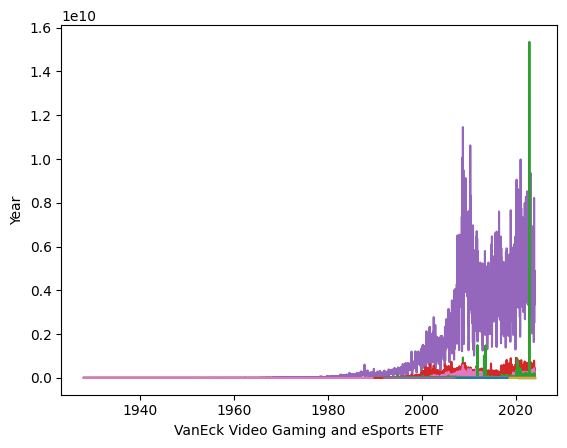

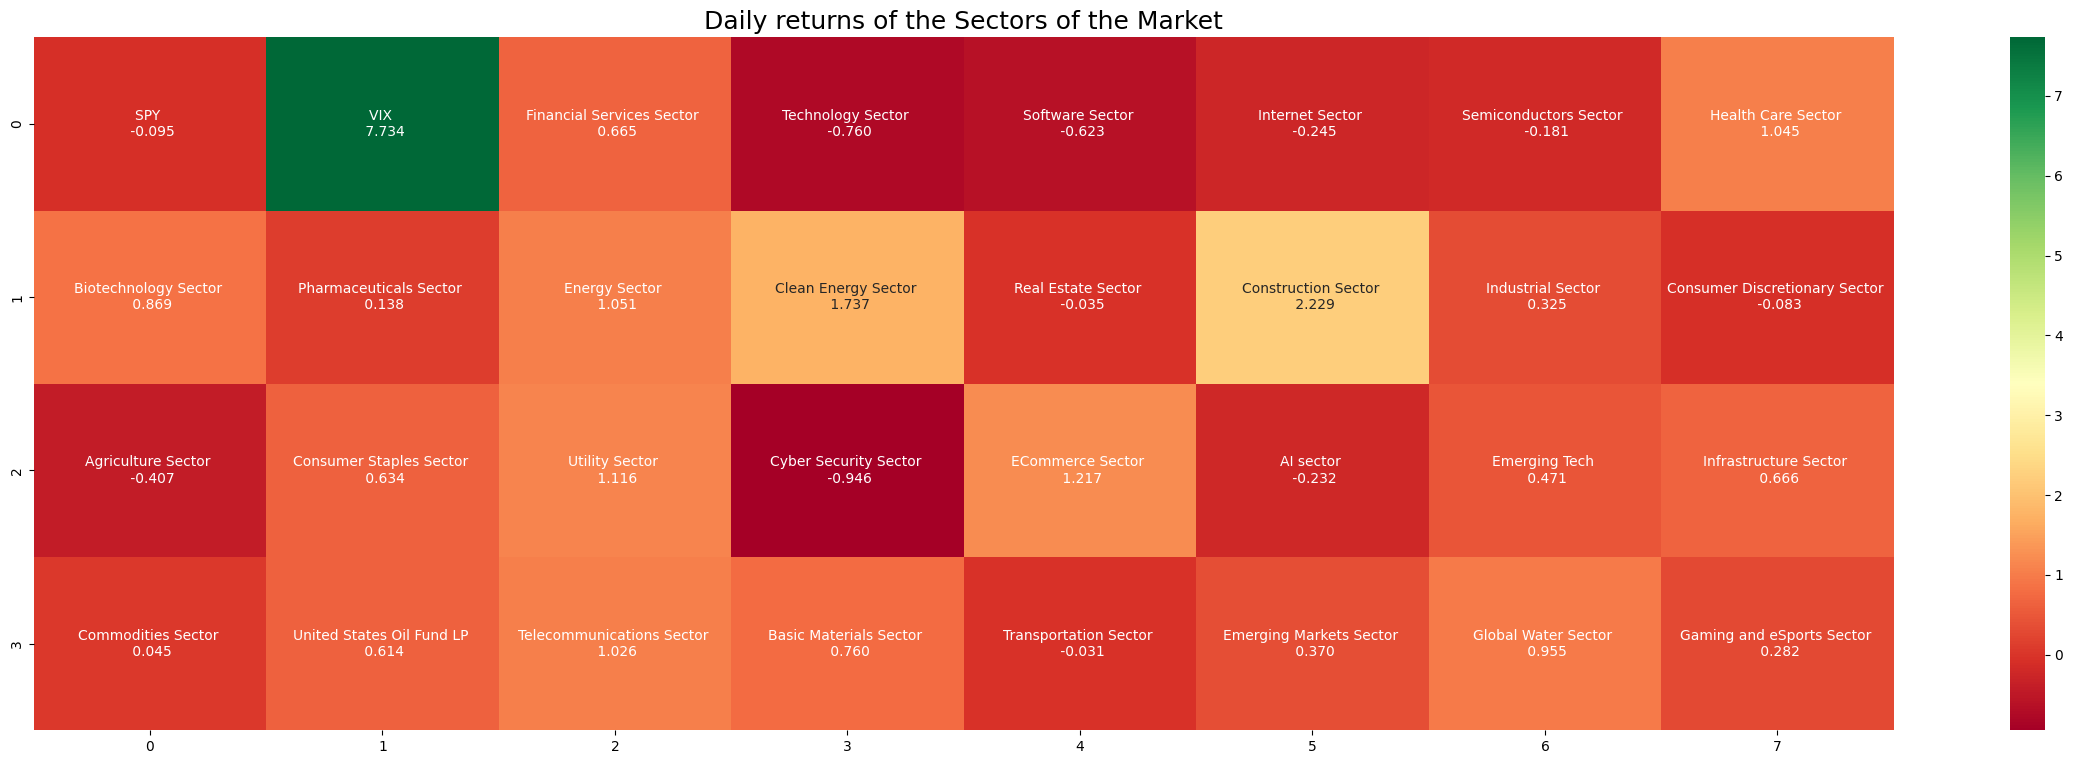

ValueError: Length mismatch: Expected axis has 5017 elements, new values have 5016 elements

In [3]:
yo = SectorsOfTheMarket()